In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt




fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()




In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6491 - loss: 11.2346 - val_accuracy: 0.7122 - val_loss: 0.8445
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7367 - loss: 0.7411 - val_accuracy: 0.7757 - val_loss: 0.6397
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7741 - loss: 0.6241 - val_accuracy: 0.7943 - val_loss: 0.5780
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7958 - loss: 0.5488 - val_accuracy: 0.7967 - val_loss: 0.5804
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8124 - loss: 0.5380 - val_accuracy: 0.8158 - val_loss: 0.5677


In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8096 - loss: 0.5775
Test Accuracy 0.81


In [15]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


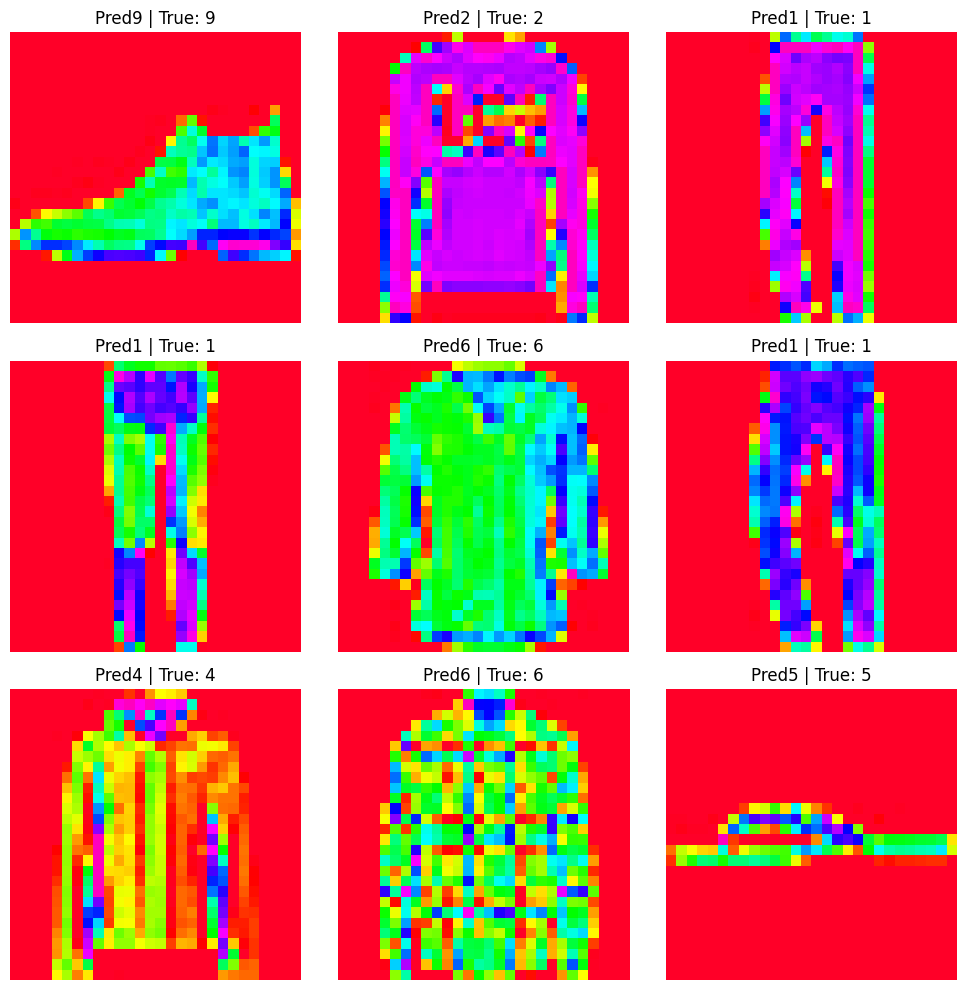

In [32]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[i], cmap='gist_rainbow')
  plt.title(f"Pred{predicted_labels[i]} | True: {y_test[i]}")
  plt.axis('off')

plt.tight_layout()
plt.show()